In [1]:
import sys, math, os
import numpy as np
from numpy import abs, log, rot90, hstack, fft, copy, vstack, ones, zeros, invert, bool
from numpy.fft import fftshift, fft2
from skimage import io, util, color, data, filters, img_as_ubyte, transform, img_as_float, exposure, morphology
from skimage.color import rgb2lab, rgb2hsv, hsv2rgb, lab2rgb, rgb2gray
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte
from scipy.ndimage.morphology import binary_hit_or_miss

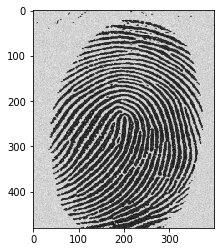

In [2]:
def make_binary(img):
    T = filters.threshold_otsu(img)
    img[img <= T] = 0
    img[img > T] = 255
    return img

finger = imread('fingerprint.jpg',0)
plt.figure()
plt.imshow(finger, cmap="gray")


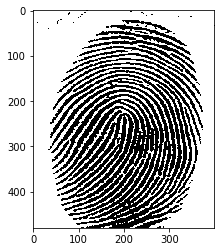

In [3]:
finger = make_binary(finger)
finger = invert(morphology.binary_closing(invert(finger)))

plt.figure()
plt.imshow(finger, cmap="gray")

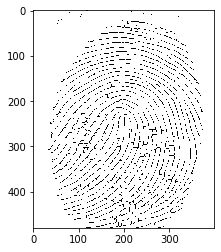

In [4]:
s1_hit = np.array([[0, 0, 0],[0, 1, 0],[1, 1, 1]])
s2_hit = np.array([[0, 0, 0],[1, 1, 0],[0, 1, 0]])
s1_miss = np.array([[1, 1, 1],[0, 0, 0],[0, 0, 0]])
s2_miss = np.array([[0, 1, 1],[0, 0, 1],[0, 0, 0]])
def skeleton_pass(img, s1_hit, s1_miss, s2_hit, s2_miss):
    img = img ^ binary_hit_or_miss(img, s1_hit, s1_miss)
    img = img ^ binary_hit_or_miss(img, s2_hit, s2_miss)
    img = img ^ binary_hit_or_miss(img, rot90(s1_hit, 1), rot90(s1_miss, 1))
    img = img ^ binary_hit_or_miss(img, rot90(s2_hit, 1), rot90(s2_miss, 1))
    img = img ^ binary_hit_or_miss(img, rot90(s1_hit, 2), rot90(s1_miss, 2))
    img = img ^ binary_hit_or_miss(img, rot90(s2_hit, 2), rot90(s2_miss, 2))
    img = img ^ binary_hit_or_miss(img, rot90(s1_hit, 3), rot90(s1_miss, 3))
    img = img ^ binary_hit_or_miss(img, rot90(s2_hit, 3), rot90(s2_miss, 3))
    return img

def skeletonize(img):
    temp1 = img
    i = 0
    while True:
        i += 1
        temp2 = skeleton_pass(temp1, s1_hit, s1_miss, s2_hit, s2_miss)
        if np.array_equal(temp1, temp2):
            break
        temp1 = np.copy(temp2)
    return temp1

finger_inv = invert(finger)

plt.figure()
plt.imshow(invert(skeletonize(finger_inv)), cmap="gray")

## Part 2:
Structuring element S1 detects pixels on the edges of objects and S2 detects pixels along diagonal edges and at the corners of objects.
## Part 3:
Each pass only removes pixels at the boundary of an object. Hence, by using multiple passes, we progressively remove the boundary pixels until the object is only 1 pixel wide.

## Part 4:

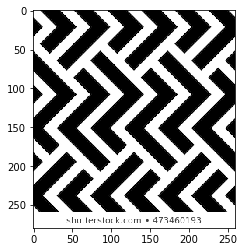

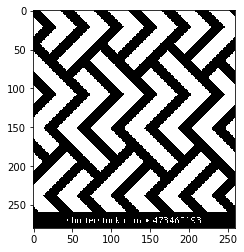

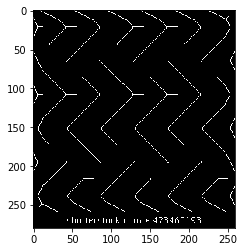

In [5]:
pattern = imread('pattern.png','uint8')
plt.figure()
plt.imshow(pattern, cmap="gray")
pattern = make_binary(img_as_ubyte(rgb2gray(pattern)))
pattern = invert(pattern).astype(bool)
plt.figure()
plt.imshow(pattern, cmap="gray")
plt.figure()
plt.imshow(skeletonize(pattern), cmap="gray")

/home/nive/.local/lib/python3.6/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


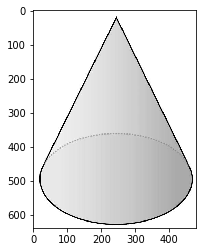

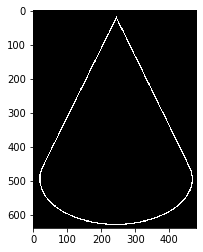

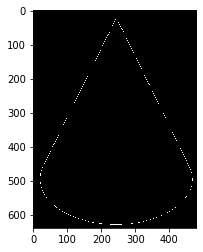

In [6]:
pattern = imread('cone.jpg','uint8')
plt.figure()
plt.imshow(pattern, cmap="gray")
pattern = make_binary(img_as_ubyte(rgb2gray(pattern)))
pattern = invert(pattern).astype(bool)
plt.figure()
plt.imshow(pattern, cmap="gray")
plt.figure()
plt.imshow(skeletonize(pattern), cmap="gray")

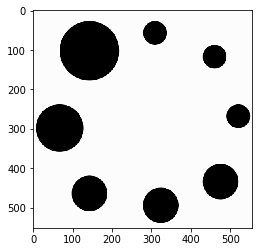

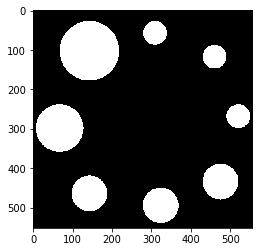

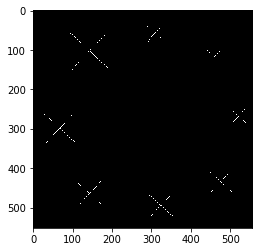

In [7]:
pattern = imread('holes.png','uint8')
plt.figure()
plt.imshow(pattern, cmap="gray")
pattern = make_binary(img_as_ubyte(rgb2gray(pattern)))
pattern = invert(pattern).astype(bool)
plt.figure()
plt.imshow(pattern, cmap="gray")
plt.figure()
plt.imshow(skeletonize(pattern), cmap="gray")